## To continue the analysis, we recall the hypothesis: "The highest proportion of attacks in the last century has taken place in the United States but the fatality level is lower".

In [88]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib as plt

In [89]:
final_attacks = pd.read_csv("../output/final_attacks_output.csv",encoding = "ISO-8859-1")

In [90]:
final_attacks[["Country","Fatal","Year", "Age"]].value_counts()

Country  Fatal  Year    Age
USA      N      2003.0  18     6
other    N      2006.0  15     5
                1964.0  19     4
USA      N      2001.0  16     4
                1995.0  19     4
                              ..
         Y      1933.0  24     1
                1926.0  18     1
                1924.0  35     1
                1922.0  18     1
other    Y      2018.0  18     1
Length: 2555, dtype: int64

In [91]:
hipothesis = final_attacks.groupby(["Country","Fatal","Year", "Age"])

## Analysis visualization

#### Graph 1: Probability of a shark attack taking place in the USA. 

<AxesSubplot:xlabel='Country', ylabel='Probability'>

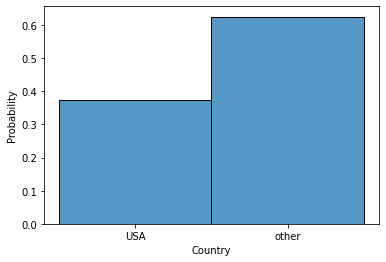

In [92]:
sns.histplot(data = final_attacks, x = "Country", stat = "probability", discrete = True)

At very first sight, the first graph shows that approximately 40% of attacks take place in the USA.

#### Graph 2: Distribution of fatal attacks between the USA and the rest of the world.

<AxesSubplot:xlabel='Country', ylabel='count'>

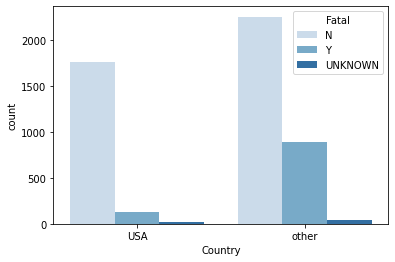

In [93]:
sns.countplot(x = final_attacks.Country, hue = final_attacks.Fatal, palette="Blues")

Additionally, the second graph shows that most of the fatalities take place outside the US.

### Graph 3: Distrubtion of attacks in the USA

In [94]:
# To filter only data in Country when value is "USA"

USA = final_attacks.loc[: , 'Country'] == 'USA'
USA_attacks = final_attacks.loc[USA]
USA_attacks.head()

,Case Number,Date,Year,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Species
0,2018.06.25,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,2018.06.18,18-Jun-2018,2018.0,USA,Georgia,"St. Simon Island, Glynn County",Standing,AdysonÂ McNeely,F,11,Minor injury to left thigh,N,NaN
2,2018.06.09,09-Jun-2018,2018.0,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,NaN
7,2018.05.27,27-May-2018,2018.0,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,"Lemon shark, 3'"
8,2018.05.26.b,26-May-2018,2018.0,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,"Bull shark, 6'"


<AxesSubplot:xlabel='Year', ylabel='Density'>

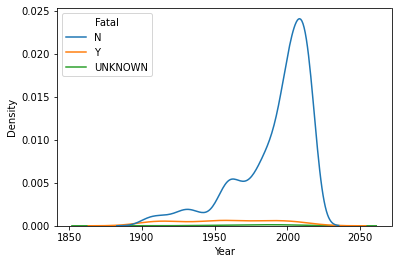

In [95]:
sns.kdeplot(x = USA_attacks.Year, hue = final_attacks.Fatal)

<AxesSubplot:xlabel='Year', ylabel='Density'>

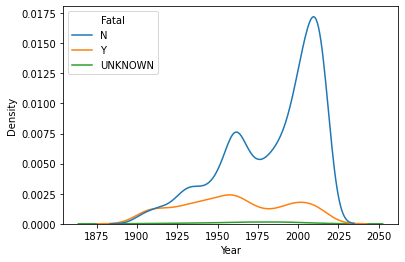

In [96]:
sns.kdeplot(x = final_attacks.Year, hue = final_attacks.Fatal)

We observe  that from 1900 to 1920, the number of attacks that ended fatally and those that did not were proportional.

However, we can see how this trend changes, increasing the number of attacks that do not end in fatality with respect to those that do.

<AxesSubplot:xlabel='Year', ylabel='Count'>

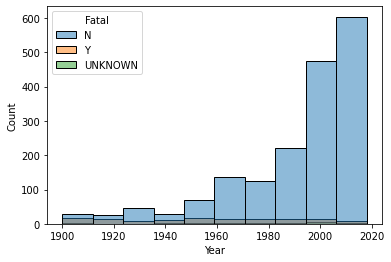

In [98]:
sns.histplot(x = final_attacks.Year, hue = final_attacks.Fatal, bins = 10)

<AxesSubplot:xlabel='Fatal', ylabel='Year'>

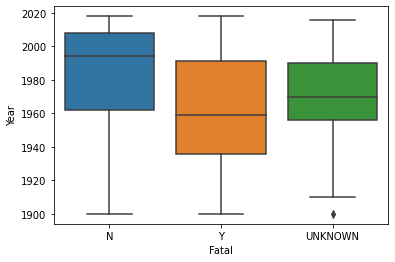

In [14]:
sns.boxplot (x = "Fatal", y = "Year", data = final_attacks)

In the graph above we can see how the fatalities are distributed on a yearly basis.